In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
plt.style.use('default')

In [2]:
csvfile = '../csv/alldata.csv'
distance_param = 'ADistance'
tragitti = pd.read_csv(csvfile, index_col=False)

pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

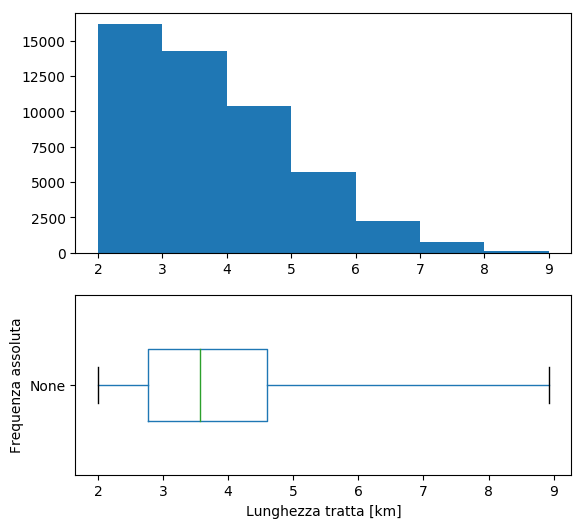

count    49552.000000
mean         3.793388
std          1.270208
min          2.000031
25%          2.763106
50%          3.573660
75%          4.595075
max          8.925404
dtype: float64

In [3]:
tragitti = tragitti[post_lock_cond]
tragitti = tragitti[clean(tragitti)]

sample = tragitti[distance_param]
sample = sample[sample <= 9.].rename(columns={'ADistance': ''})

gbins = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6)
h.yaxis.label.set_visible(False)
sample.plot.hist(bins=gbins, ax=h)
sample.plot.box(vert=False, whis='range', ax=b, widths=.4)
plt.xlabel('Lunghezza tratta [km]')
plt.ylabel('Frequenza assoluta')
plt.show()

sample.describe()

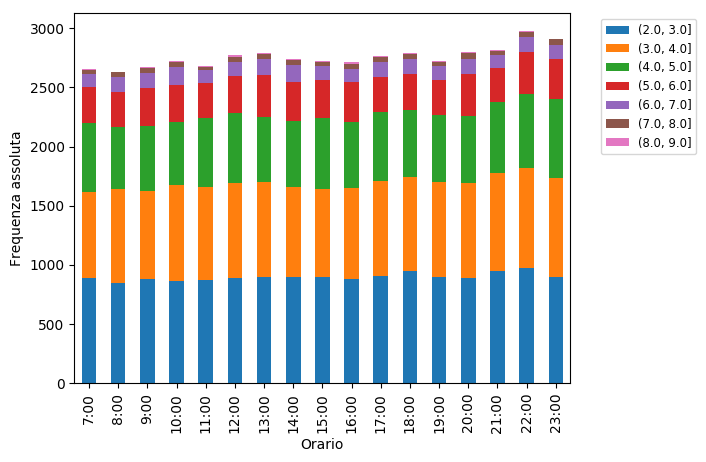

In [4]:
myindex = [
    '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

tragitti = tragitti[tragitti['Hour'] != 0]
hour_length_freq = pd.crosstab(
    index=tragitti['Hour'],
    columns=pd.cut(tragitti[distance_param],
    bins=gbins))
hour_length_freq.index = myindex
hour_length_freq.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('Orario')
plt.ylabel('Frequenza assoluta')
plt.show()

In [5]:
length_hour_freq = pd.crosstab(
    index=pd.cut(tragitti[distance_param], bins=gbins),
    columns='%')

(length_hour_freq / sum(length_hour_freq.values)).apply(lambda p: np.round(p, 4)*100)

col_0,%
ADistance,
"(2.0, 3.0]",32.51
"(3.0, 4.0]",28.75
"(4.0, 5.0]",20.89
"(5.0, 6.0]",11.60
"(6.0, 7.0]",4.50
"(7.0, 8.0]",1.47
"(8.0, 9.0]",0.28
